In [74]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [75]:
#Loading the dataset
data = pd.read_csv('vehicle.csv')

In [76]:
#Getting the overview of dataset
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [77]:
#Shape of the dataset
data.shape

(846, 19)

In [78]:
#Datatypes of variables
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [79]:
#Changing the class variable to category type
data['class'] = data['class'].astype('category')
data.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [80]:
#Checking for missing values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [81]:
#Few missing values are found and these are replaced with median value
class_variable = data['class']
filler = lambda x: x.fillna(x.median())
data = data.iloc[:,:-1].apply(filler, axis = 0)
data = data.join(class_variable)

In [82]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [83]:
#Checking for any duplicate rows
dups  = data.duplicated()
dups.sum()

0

In [84]:
#Dataset description through five point summary
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [85]:
data_cols = data.columns
col_list = list(data_cols)
col_list

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio',
 'class']

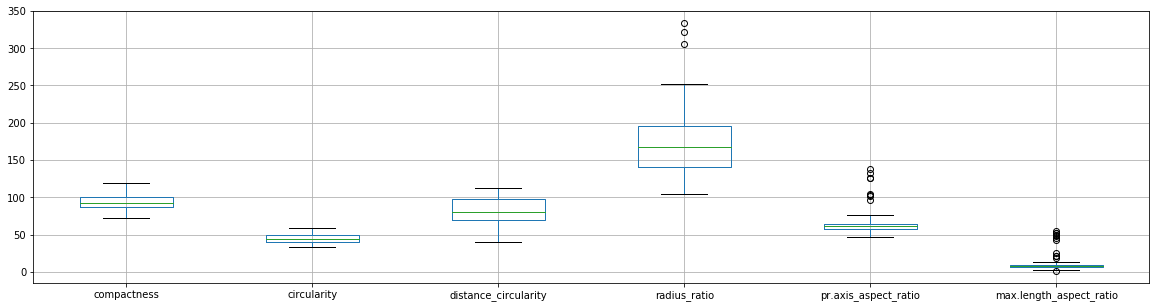

In [86]:
#Drawing box plot across all the variables
data.boxplot(column=col_list[0:6],figsize=(20,5))

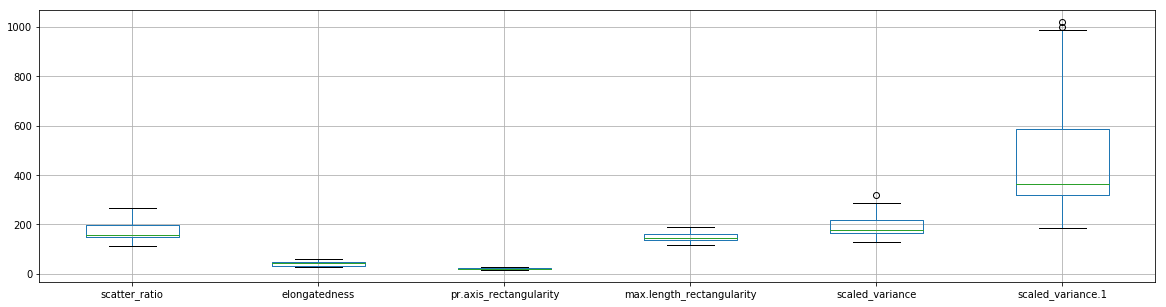

In [87]:
data.boxplot(column=col_list[6:12],figsize=(20,5))

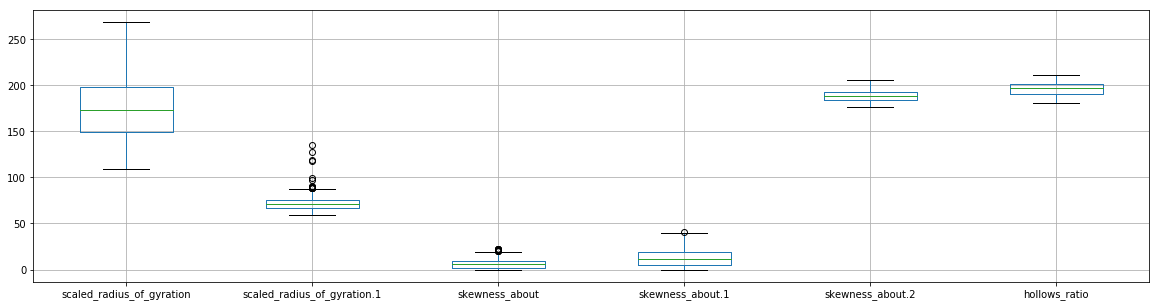

In [88]:
data.boxplot(column=col_list[12:18],figsize=(20,5))

In [89]:
#From above informtion it seems like there are few outliers in four variables but these won't have much impact on SVM models.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024853590AC8>,
      dtype=object)

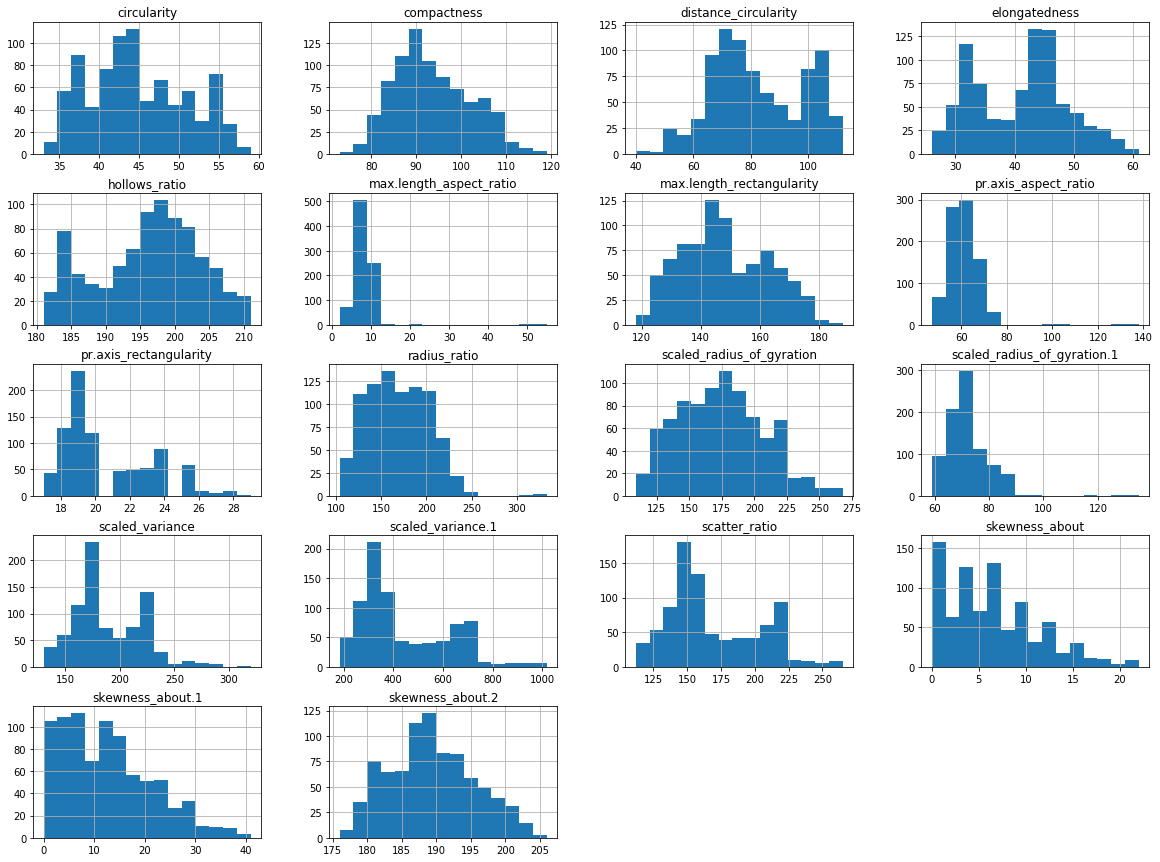

In [90]:
#Lets check the distribution of the variables
data.hist(column=col_list[0:18],figsize=(20,15),bins=15)

In [91]:
#Checking correlation b/w variables
data.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

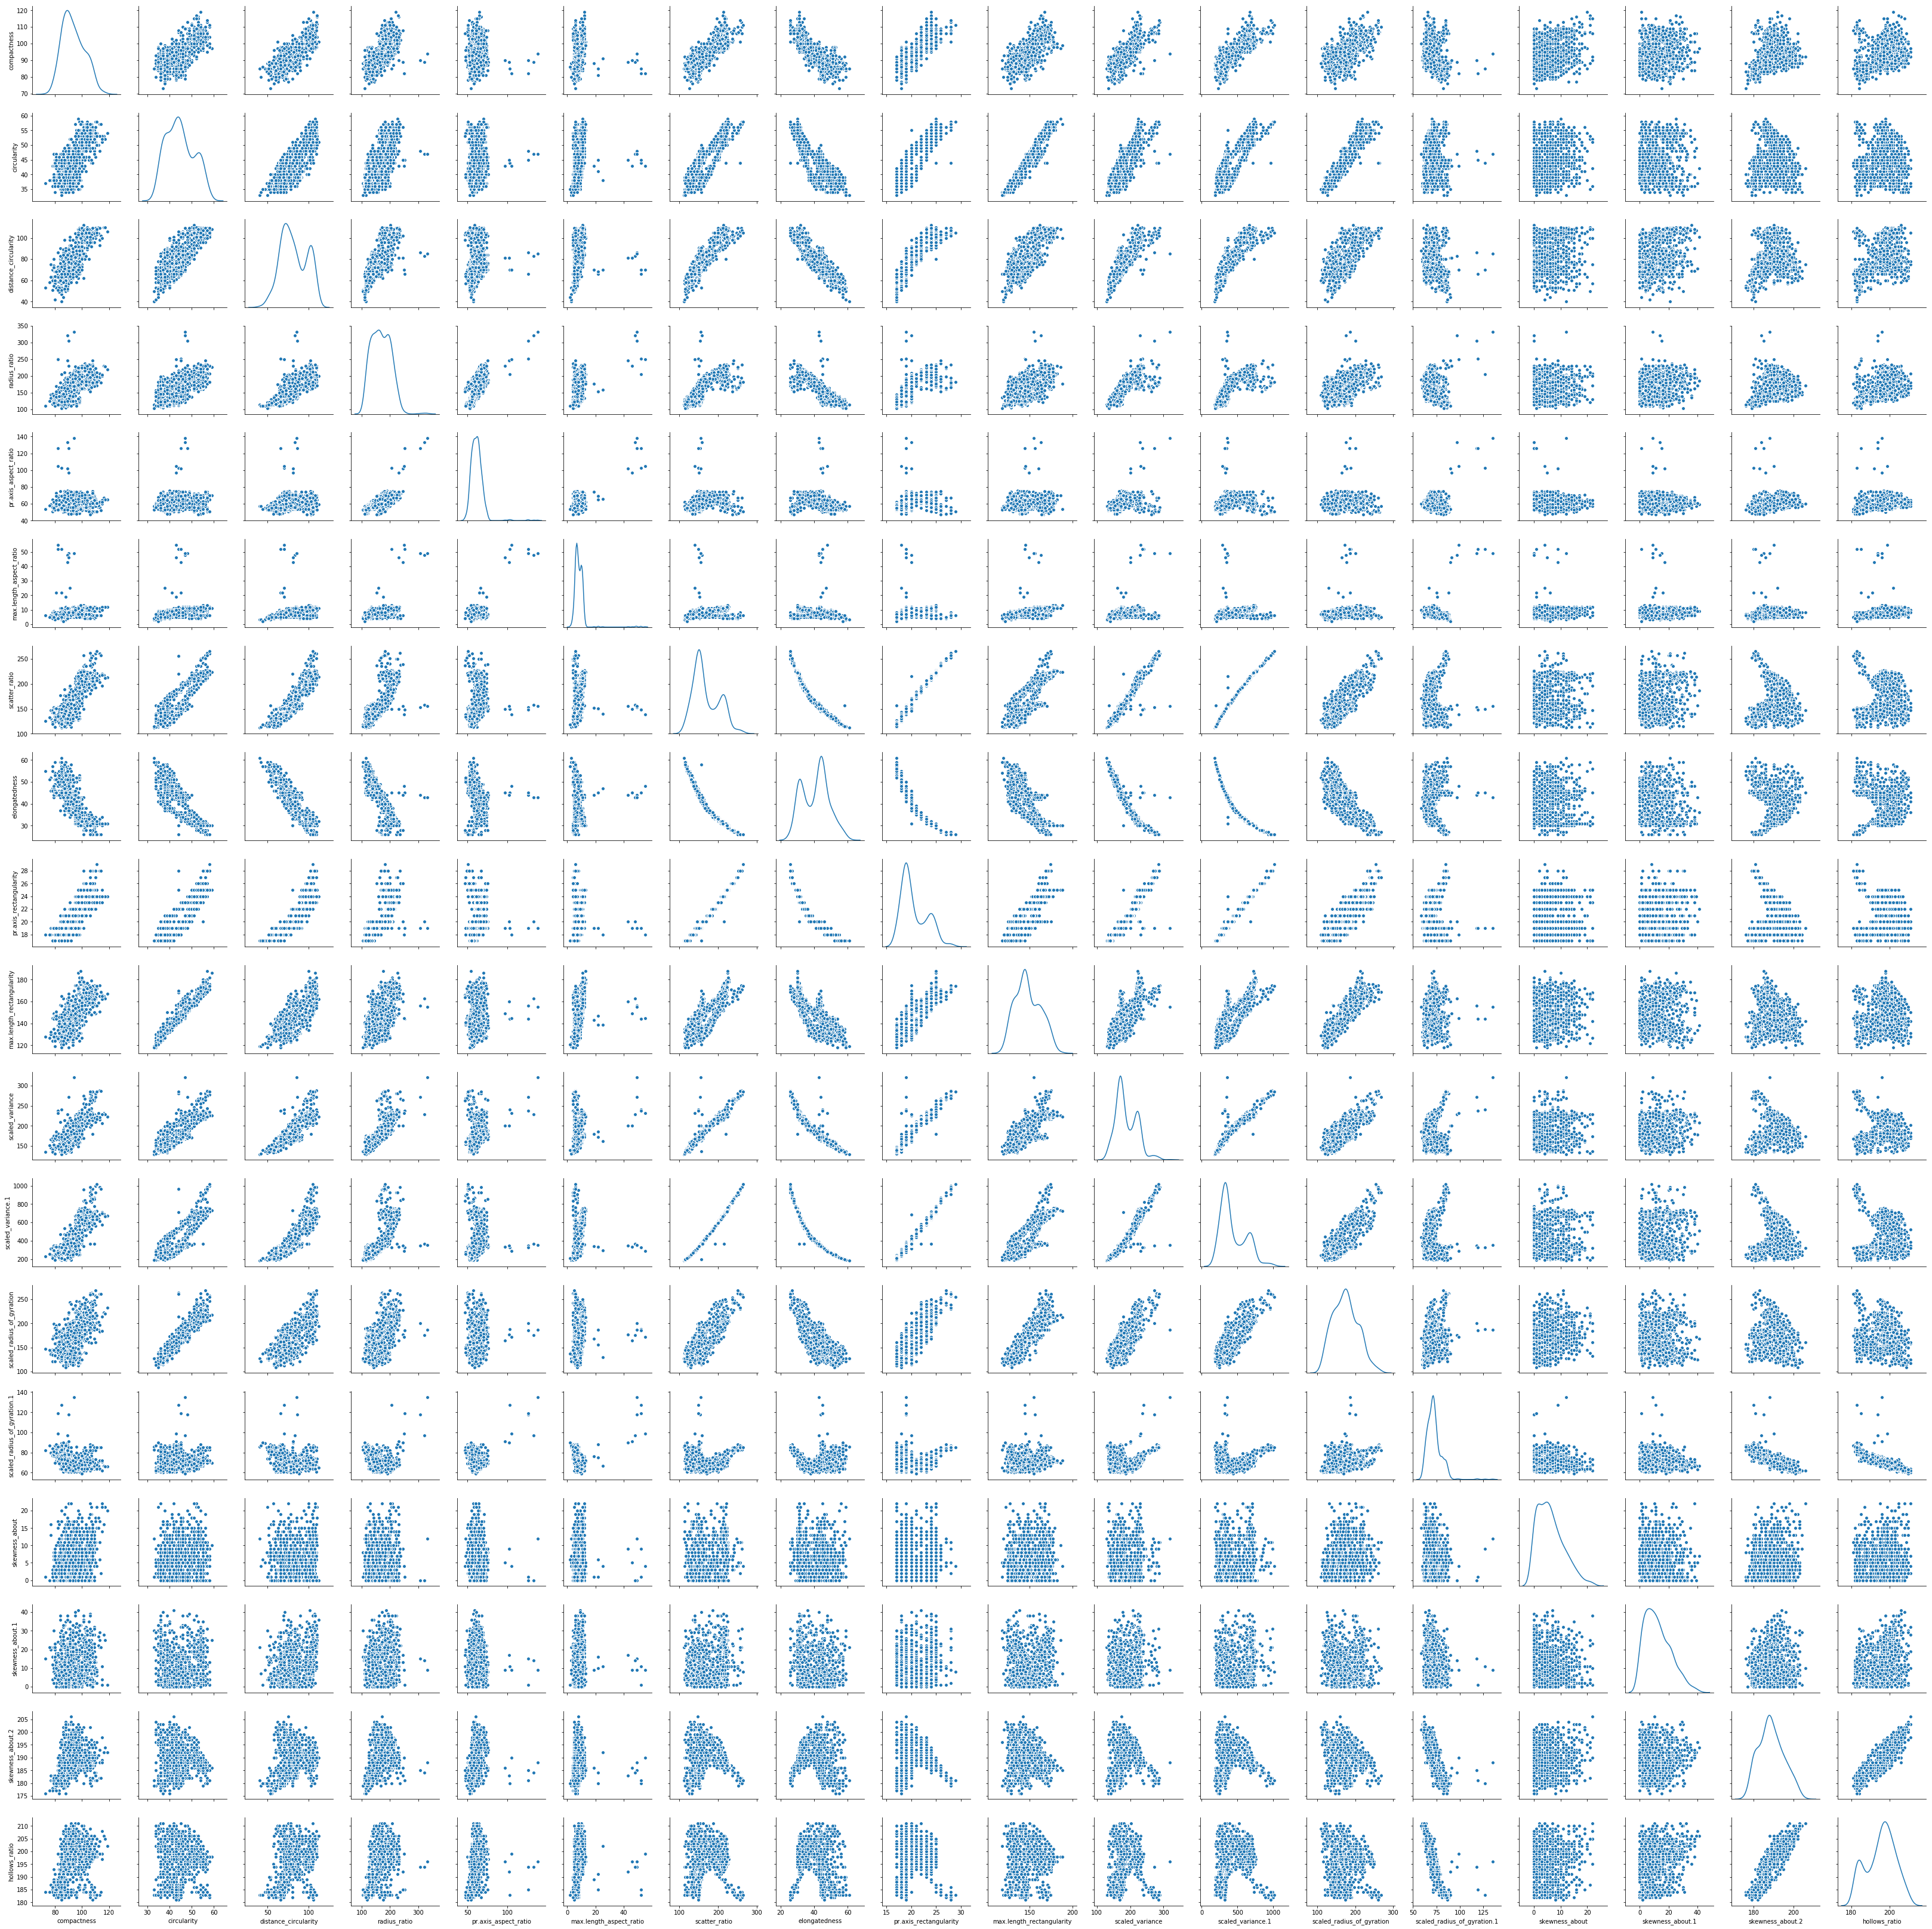

In [92]:
sns.pairplot(data,diag_kind='kde')

In [93]:
#From Above information we can see many positive and negative correlation and this will be useful in PCA for feature extraction

In [94]:
#Now let's look at class variable information
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

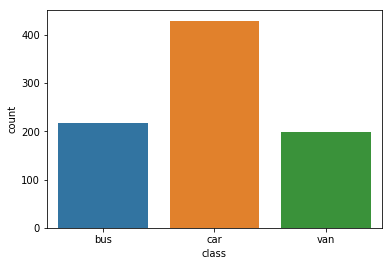

In [95]:
sns.countplot(data['class'])

In [96]:
#Replacing car, bus and van as 1,2,3 respectively
data['class'] = data['class'].replace('car',1)
data['class'] = data['class'].replace('bus',2)
data['class'] = data['class'].replace('van',3)
data['class'].value_counts()

1    429
2    218
3    199
Name: class, dtype: int64

In [97]:
#We can see three categories of vehicle. The distribution of Van and Bus are closeby, whereas car distribution is higher than other two vehicles

In [98]:
#Our Pridictive varible is 'class', so we will sperate this column. Also it will be helpful for PCA, where we are not going to work on class variable.

In [99]:
#Spliting the data
X = data.drop('class', axis = 1)
y = data['class']

In [100]:
#Scling the data as this is much needed for both SVM and PCA
X_scaled = X.apply(zscore)
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [101]:
#Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 10)

In [102]:
#SVM Model
clf_model = SVC(kernel='rbf',random_state=10)
clf_model.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
svm_train_score = clf_model.score(X_train , y_train)
print ('Train set score of SVM model before PCA is', (svm_train_score))

Train set score of SVM model before PCA is 0.9746621621621622


In [104]:
svm_test_score = clf_model.score(X_test , y_test)
print ('Test set score of SVM model before PCA is', (svm_test_score))

Test set score of SVM model before PCA is 0.9606299212598425


In [105]:
#Performance of the model looks good in both train and test set

In [106]:
#Accuracy score
y_train_pred = clf_model.predict(X_train)
y_test_pred = clf_model.predict(X_test)
Accuracy_score_train = accuracy_score(y_train,y_train_pred)
Accuracy_score_test = accuracy_score(y_test,y_test_pred)
print ('Train set accuracy score of SVM model before PCA is', (Accuracy_score_train))
print ('Test set accuracy score of SVM model before PCA is', (Accuracy_score_test))

Train set accuracy score of SVM model before PCA is 0.9746621621621622
Test set accuracy score of SVM model before PCA is 0.9606299212598425


In [107]:
#Performing Cross Validation using KFold

kfold = KFold(n_splits=8, random_state=10)
results = cross_val_score(clf_model,X_scaled,y, cv=kfold)
print(results)
acc_kfold_b4_PCA = results.mean()
print("Accuracy of the model using KFold before PCA: %.3f%%" % (results.mean()*100.0))


[0.94339623 0.97169811 0.97169811 0.97169811 0.98113208 0.96226415
 0.98095238 0.95238095]
Accuracy of the model using KFold before PCA: 96.690%


In [108]:
#Performing Principal Component Analysis

In [109]:
#We had already scaled the data, so going ahead with creating covariance matrix
cov_mat = np.cov(X_scaled,rowvar=False)
cov_mat

array([[ 1.00118343,  0.68569786,  0.79086299,  0.69055952,  0.09164265,
         0.14842463,  0.81358214, -0.78968322,  0.81465658,  0.67694334,
         0.76297234,  0.81497566,  0.58593517, -0.24988794,  0.23635777,
         0.15720044,  0.29889034,  0.36598446],
       [ 0.68569786,  1.00118343,  0.79325751,  0.6216467 ,  0.15396023,
         0.25176438,  0.8489411 , -0.82244387,  0.84439802,  0.96245572,
         0.79724837,  0.83693508,  0.92691166,  0.05200785,  0.14436828,
        -0.01145212, -0.10455005,  0.04640562],
       [ 0.79086299,  0.79325751,  1.00118343,  0.76794246,  0.15864319,
         0.26499957,  0.90614687, -0.9123854 ,  0.89408198,  0.77544391,
         0.86253904,  0.88706577,  0.70660663, -0.22621115,  0.1140589 ,
         0.26586088,  0.14627113,  0.33312625],
       [ 0.69055952,  0.6216467 ,  0.76794246,  1.00118343,  0.66423242,
         0.45058426,  0.73529816, -0.79041561,  0.70922371,  0.56962256,
         0.79435372,  0.71928618,  0.53700678, -0.180

In [110]:
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
#Eigen Values
print('Eigne values:', pca.explained_variance_)

Eigne values: [9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [112]:
#Eigen Vectors
print('Eigne vectors:', pca.components_)

Eigne vectors: [[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.1

In [113]:
#Percentage of variance explained by each eigen vectors
print('Percentage of variance explained:', pca.explained_variance_ratio_)

Percentage of variance explained: [5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


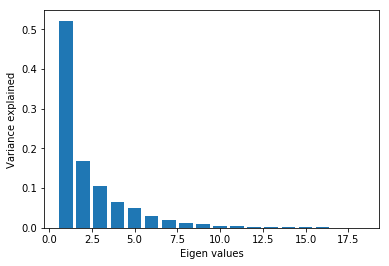

In [114]:
#Plotting Percentage of variance explained
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,align='center')
plt.xlabel('Eigen values')
plt.ylabel('Variance explained')
plt.show()

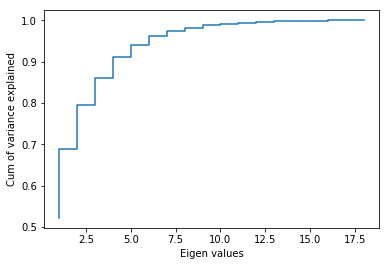

In [115]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen values')
plt.ylabel('Cum of variance explained')
plt.show()

In [116]:
#Percentage of variance explained by each eigen vectors
print('Percentage ratio of variance explained:', np.cumsum(pca.explained_variance_ratio_))

Percentage ratio of variance explained: [0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549 0.97335049 0.98226265 0.98735979 0.99104984 0.9936357
 0.99562195 0.99714304 0.99828498 0.99927917 0.9998355  1.        ]


In [117]:
#From Above information it is found that we can get 95% of varaiance explained with just 7 variables

In [118]:
#Now reducing the dimensions by 7 using PCA
reduced_pca = PCA(n_components=7)
reduced_pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [119]:
print(reduced_pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012]


In [120]:
print(reduced_pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366]


In [121]:
#Doing transform on previously scaled data
final_X = reduced_pca.transform(X_scaled)

In [122]:
final_X

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
         7.93007079e-02, -7.57446693e-01, -9.01124283e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         6.93948582e-01, -5.17161832e-01,  3.78636988e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.31732265e-01,  7.05041037e-01, -3.45837595e-02],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -1.34423635e+00, -2.17069763e-01,  5.73248962e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
         4.27680052e-02, -4.02491279e-01, -2.02405787e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -5.40510367e-02, -3.35637136e-01,  5.80978683e-02]])

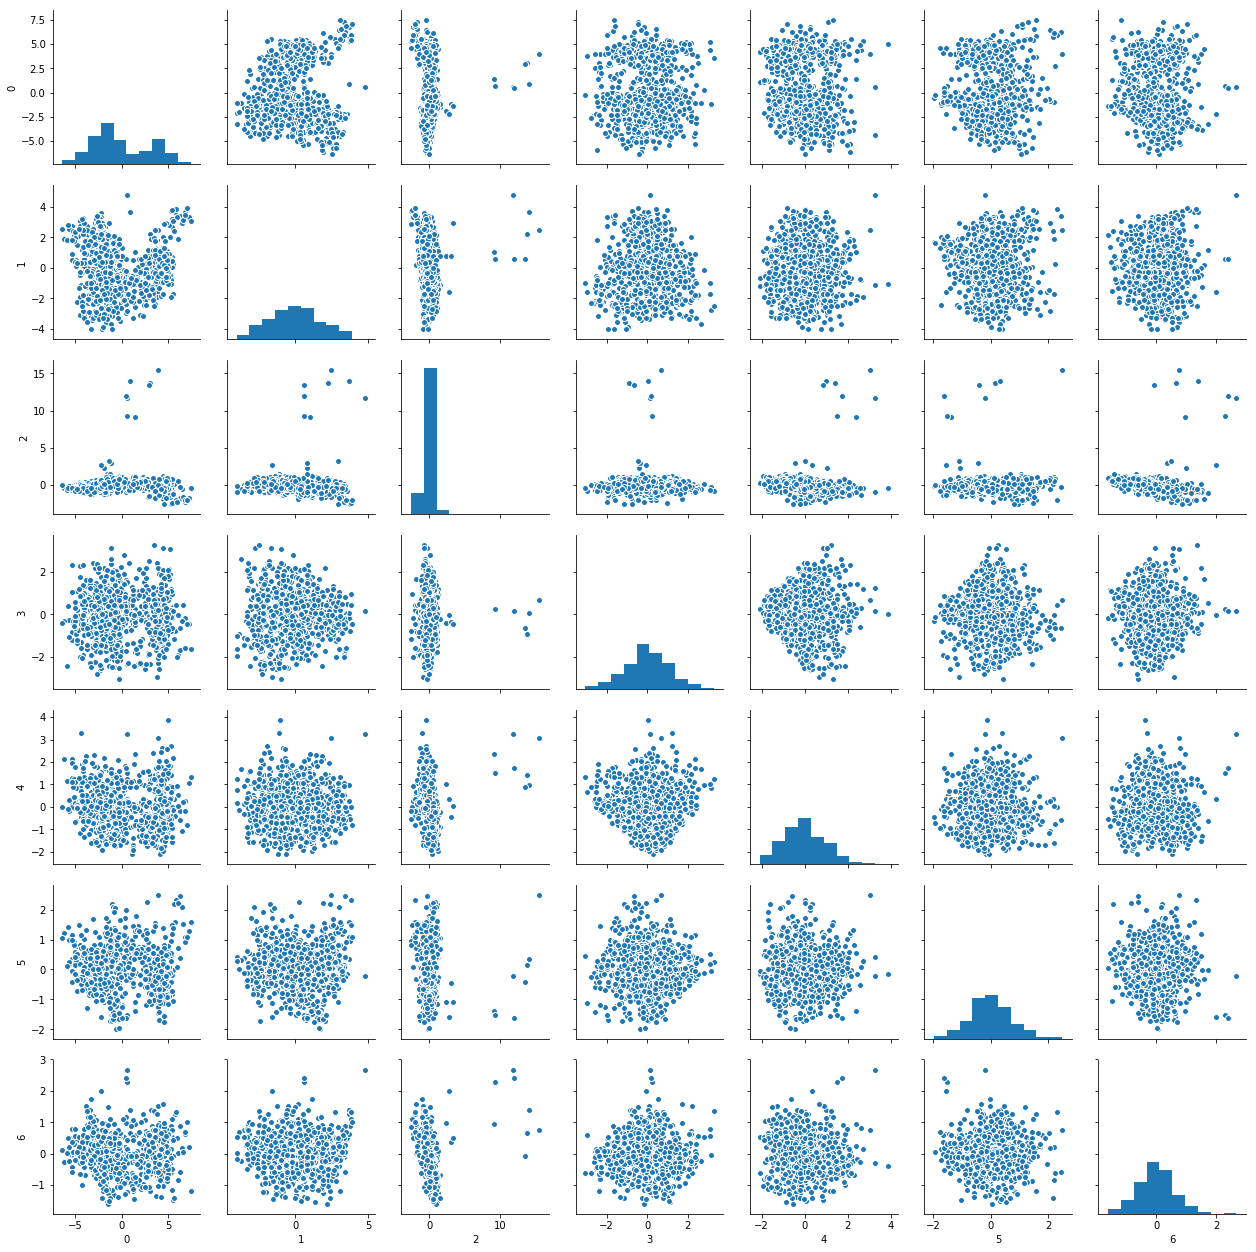

In [123]:
#Getting pairplot on newly reduced dimensions
sns.pairplot(pd.DataFrame(final_X))

In [124]:
#With above operations we succesfully reduced dimensions to 7 and final_X is data obtained through PCA

In [125]:
#Splitting model again with reduced variables through PCA
X_train,X_test,y_train,y_test = train_test_split(final_X,y,test_size=0.3,random_state = 10)
print(X_train.shape)
print(X_test.shape)

(592, 7)
(254, 7)


In [126]:
#SVM with PCA
clf_reduced_model = SVC(kernel='rbf',random_state=10)
clf_reduced_model.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
svm_train_score_reduced = clf_reduced_model.score(X_train , y_train)
print ('Train set score of SVM model after PCA is', (svm_train_score_reduced))

Train set score of SVM model after PCA is 0.9611486486486487


In [128]:
svm_test_score_reduced = clf_reduced_model.score(X_test , y_test)
print ('Test set score of SVM model after PCA is', (svm_test_score_reduced))

Test set score of SVM model after PCA is 0.9094488188976378


In [129]:
#Accuracy score after PCA
y_train_pred_r = clf_reduced_model.predict(X_train)
y_test_pred_r = clf_reduced_model.predict(X_test)
Accuracy_score_train_r = accuracy_score(y_train,y_train_pred_r)
Accuracy_score_test_r = accuracy_score(y_test,y_test_pred_r)
print ('Train set accuracy score of SVM model after PCA is', (Accuracy_score_train_r))
print ('Test set accuracy score of SVM model after PCA is', (Accuracy_score_test_r))

Train set accuracy score of SVM model after PCA is 0.9611486486486487
Test set accuracy score of SVM model after PCA is 0.9094488188976378


In [130]:
#Performing Cross Validation using KFold

kfold = KFold(n_splits=8, random_state=10)
results_pca = cross_val_score(clf_reduced_model,final_X,y, cv=kfold)
print(results_pca)
acc_kfold_after_PCA = results_pca.mean()
print("Accuracy of the model using KFold after PCA: %.3f%%" % (results_pca.mean()*100.0))

[0.91509434 0.94339623 0.91509434 0.91509434 0.93396226 0.91509434
 0.96190476 0.88571429]
Accuracy of the model using KFold after PCA: 92.317%


In [131]:
#Comparision of Accuracy score before and after PCA

In [132]:
print('Accuracy score with Raw data (before PCA):')
print('Train set accuracy score of SVM model before PCA is', (Accuracy_score_train))
print('Test set accuracy score of SVM model before PCA is', (Accuracy_score_test))
print('Average accuracy score using KFold cross validation on SVM model before PCA is', (acc_kfold_b4_PCA))
print('\n')
print('Accuracy score after PCA:')
print('Train set accuracy score of SVM model after PCA is', (Accuracy_score_train_r))
print('Test set accuracy score of SVM model after PCA is', (Accuracy_score_test_r))
print('Average accuracy score using KFold cross validation on SVM model after PCA is', (acc_kfold_after_PCA))

Accuracy score with Raw data (before PCA):
Train set accuracy score of SVM model before PCA is 0.9746621621621622
Test set accuracy score of SVM model before PCA is 0.9606299212598425
Average accuracy score using KFold cross validation on SVM model before PCA is 0.9669025157232704


Accuracy score after PCA:
Train set accuracy score of SVM model after PCA is 0.9611486486486487
Test set accuracy score of SVM model after PCA is 0.9094488188976378
Average accuracy score using KFold cross validation on SVM model after PCA is 0.9231693620844565


In [133]:
##OVERALL SUMMARY

#With raw model (19 Dimensions) we are getting accuracy score of 96% and after doing PCA (just 7 Dimensions) we getting accuracy score of 91% on the test data.
#Through PCA with lesser dimensions we can able to achieve decent accuracy score which is almost near to accuracy score of raw model dimension. This will help us with less time consumption for training the model and less memory consumption as well.